In [1]:
import glob
f2ADPRs=glob.glob("data/2A-CS-*DPR*")
f2ADPRs=sorted(f2ADPRs)
f2BCMBs=glob.glob("data/2B-CS-*CORRA*")
f2BCMBs=sorted(f2BCMBs)
print(f2ADPRs)
print(f2BCMBs)


['data/2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S011631-E012509.029377.V07A.HDF5', 'data/2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S025200-E025742.029378.V07A.HDF5', 'data/2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S075135-E075444.029381.V07A.HDF5', 'data/2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S092409-E093249.029382.V07A.HDF5', 'data/2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S105642-E110522.029383.V07A.HDF5', 'data/2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S123559-E123755.029384.V07A.HDF5', 'data/2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S225229-E225821.029391.V07A.HDF5', 'data/2A-CS-CONUS.GPM.DPR.V9-20211125.20190502-S002504-E003342.029392.V07A.HDF5', 'data/2A-CS-CONUS.GPM.DPR.V9-20211125.20190502-S015740-E020618.029393.V07A.HDF5', 'data/2A-CS-CONUS.GPM.DPR.V9-20211125.20190502-S033833-E033853.029394.V07A.HDF5', 'data/2A-CS-CONUS.GPM.DPR.V9-20211125.20190502-S070017-E070040.029396.V07A.HDF5', 'data/2A-CS-CONUS.GPM.DPR.V9-20211125.20190502-S083252-E084132.029397.V07A.HDF5', 'data/2A-CS-CON

In [6]:
import netCDF4 as nc
import numpy as np
n1=0
n2=900
zKuObs_Strat=[]
zKaObs_Strat=[]
binZeroDeg_Strat=[]
pia_HB_DPR_strat=[]
pia_HB_CMB_strat=[]
binClutterFree_Strat=[]
binRealSurface_Strat=[]
jRay_Strat=[]
logdNw_Strat=[]
binStormTop_Strat=[]
nearSurfPrecipTotRate_Strat=[]
import tqdm
for f in tqdm.tqdm(f2ADPRs[:]):
    orb=f.split(".")[-3]
    ifound=0
    for fcmb in f2BCMBs:
        if orb in fcmb[-17:]:
            #print(f,fcmb)
            ifound=1
            break
    if ifound==1:
        with nc.Dataset(f) as fh:
            zKuObs = fh['FS/PRE/zFactorMeasured'][n1:n2]
            binRealSurface = fh['FS/PRE/binRealSurface'][n1:n2]
            localZenithAngle = fh['FS/PRE/localZenithAngle'][n1:n2]
            elevation = fh['FS/PRE/elevation'][n1:n2]
            binClutterFree = fh['FS/PRE/binClutterFreeBottom'][n1:n2]
            binZeroDegree = fh['FS/VER/binZeroDeg'][n1:n2]
            piaHB = fh['FS/SLV/piaFinal'][n1:n2]
            srtrelPIAku = fh['FS/SRT/reliabFactorHY'][n1:n2]
            NSRelibFlag = fh['FS/SRT/reliabFlagHY'][n1:n2]
            rainType = (fh['FS/CSF/typePrecip'][n1:n2]/1e7).astype(int)
            snowIceCover = fh['FS/PRE/snowIceCover'][n1:n2]
            seaIceConcentration = fh['FS/Experimental/seaIceConcentration'][n1:n2]
            snrRatioku = fh['FS/PRE/snRatioAtRealSurface'][n1:n2]
            srtPIAku = fh['FS/SRT/PIAhybrid'][n1:n2]
            sigmaZeroKu = fh['FS/PRE/sigmaZeroMeasured'][n1:n2]
            freeZH = fh['FS/VER/heightZeroDeg'][n1:n2]
            envTemp = fh['FS/VER/airTemperature'][n1:n2]
            binStormTop = fh['FS/PRE/binStormTop'][n1:n2]
        with nc.Dataset(fcmb) as fh:
            var_keys=fh['KuKaGMI'].variables.keys()
            precipTotLogNw=fh['KuKaGMI/precipTotLogNw'][n1:n2]
            piaCMB=fh['KuKaGMI/pia'][n1:n2]
            nearSurfPrecipTotRate=fh['KuKaGMI/nearSurfPrecipTotRate'][n1:n2]
        a=np.nonzero(rainType==2)
        if len(a[0])==0:
            continue
        b=np.nonzero(np.abs(a[1]-24)<12)
        if len(b[0])==0:
            continue
        c=np.nonzero(piaCMB[:,:,0][a][b]>-0.1)
        if len(c[0])==0:
            continue
        zKuObs_Strat.extend(zKuObs[:,:,:,0][a][b][c])
        zKaObs_Strat.extend(zKuObs[:,:,:,1][a][b][c])
        binZeroDeg_Strat.extend(binZeroDegree[a][b][c])
        binStormTop_Strat.extend(binStormTop[:,:][a][b][c])
        pia_HB_DPR_strat.extend(piaHB[a][b][c])
        pia_HB_CMB_strat.extend(piaCMB[a][b][c])
        binClutterFree_Strat.extend(binClutterFree[a][b][c])
        binRealSurface_Strat.extend(binRealSurface[a][b][c])
        jRay_Strat.extend(a[1][b][c])
        logdNw_Strat.extend(precipTotLogNw[:,:,:][a][b][c])
        nearSurfPrecipTotRate_Strat.extend(nearSurfPrecipTotRate[:,:][a][b][c])
        #break


  0%|          | 0/653 [00:00<?, ?it/s]


In [7]:

import xarray as xr
zKuObs_Strat_xr=xr.DataArray(zKuObs_Strat,name='zKuObs')
zKaObs_Strat_xr=xr.DataArray(zKaObs_Strat,name='zKaObs')
binZeroDeg_Strat_xr=xr.DataArray(binZeroDeg_Strat,name='binZeroDeg')
binStormTop_Strat_xr=xr.DataArray(binStormTop_Strat,name='binStormTop')
pia_HB_DPR_strat_xr=xr.DataArray(pia_HB_DPR_strat,name='pia_HB_DPR',dims=['dim_0','dim_channel'])
pia_HB_CMB_strat_xr=xr.DataArray(pia_HB_CMB_strat,name='pia_HB_CMB',dims=['dim_0','dim_channel'])
binClutterFree_Strat_xr=xr.DataArray(binClutterFree_Strat,name='binClutterFree')
binRealSurface_Strat_xr=xr.DataArray(binRealSurface_Strat,name='binRealSurface',dims=['dim_0','dim_channel'])
nearSurfPrecipTotRate_Strat_xr=xr.DataArray(nearSurfPrecipTotRate_Strat,name='nearSurfPrecipTotRate')
jRay_Strat_xr=xr.DataArray(jRay_Strat,name='jRay')
logdNw_Strat_xr=xr.DataArray(logdNw_Strat,dims=['dim_0','dim_1_cmb'])
print(binRealSurface_Strat_xr)
ds=xr.Dataset({'zKuObs':zKuObs_Strat_xr,'zKaObs':zKaObs_Strat_xr,'binZeroDeg':binZeroDeg_Strat_xr,'pia_HB_DPR':pia_HB_DPR_strat_xr,'pia_HB_CMB':pia_HB_CMB_strat_xr,'binClutterFree':binClutterFree_Strat_xr,'binRealSurface':binRealSurface_Strat_xr,'jRay':jRay_Strat_xr,'logdNw':logdNw_Strat_xr,'binStormTop':binStormTop_Strat_xr,'nearSurfPrecipTotRate':nearSurfPrecipTotRate_Strat_xr})
comp=dict(zlib=True, complevel=5)
encoding = {var: comp for var in ds.data_vars}
ds.to_netcdf('data/convective_training_data.nc',encoding=encoding)


<xarray.DataArray 'binRealSurface' (dim_0: 50, dim_channel: 2)> Size: 200B
array([[171, 171],
       [172, 172],
       [171, 171],
       [171, 171],
       [171, 172],
       [171, 172],
       [171, 171],
       [171, 171],
       [171, 171],
       [171, 171],
       [171, 171],
       [171, 171],
       [172, 172],
       [172, 172],
       [171, 171],
       [170, 171],
       [171, 171],
       [173, 173],
       [172, 172],
       [172, 172],
...
       [173, 173],
       [172, 172],
       [172, 172],
       [172, 172],
       [173, 173],
       [172, 172],
       [173, 173],
       [172, 173],
       [173, 173],
       [173, 173],
       [174, 174],
       [173, 173],
       [173, 173],
       [173, 174],
       [172, 172],
       [173, 173],
       [173, 174],
       [172, 173],
       [173, 173],
       [173, 173]], dtype=int16)
Dimensions without coordinates: dim_0, dim_channel


In [22]:
print(logdNw_Strat_xr.data[-1,a_dnw])
np.log10(0.08e8)
print(var_keys)

[[5.8470526 5.8595834 5.87224   5.8838863 5.895649  6.081301  6.2688103
  6.7135205 6.3396325 6.706778 ]]
dict_keys(['Latitude', 'Longitude', 'sunLocalTime', 'surfaceAirPressure', 'surfaceAirTemperature', 'surfaceVaporDensity', 'skinTemperature', 'skinTempSigma', 'envParamNode', 'airPressure', 'airTemperature', 'vaporDensity', 'cloudLiqWaterCont', 'cloudIceWaterCont', 'lowestUnclutteredBin', 'lowestEstimateBin', 'phaseBinNodes', 'precipTotDm', 'precipTotLogNw', 'precipTotMu', 'precipTotWaterCont', 'precipTotWaterContSigma', 'precipLiqWaterCont', 'precipTotRate', 'precipTotRateSigma', 'precipLiqRate', 'multiScatMaxContrib', 'nubfPIAfactor', 'nearSurfPrecipTotRate', 'nearSurfPrecipTotRateSigma', 'nearSurfPrecipLiqRate', 'estimSurfPrecipTotRate', 'estimSurfPrecipTotRateSigma', 'estimSurfPrecipLiqRate', 'tenMeterWindSpeed', 'tenMeterWindSigma', 'surfEmissivity', 'surfEmissSigma', 'simulatedBrightTemp', 'pia', 'correctedReflectFactor'])


[[1.         0.74733816]
 [0.74733816 1.        ]]


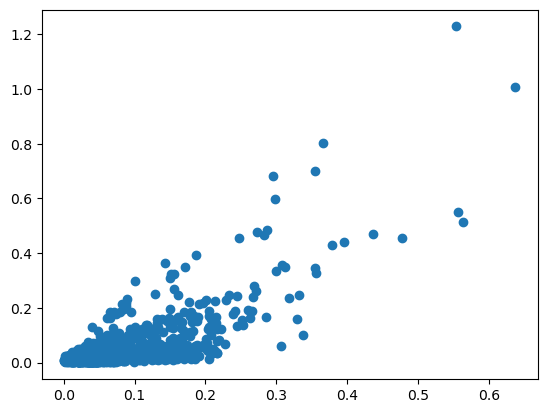

In [39]:
import matplotlib.pyplot as plt
plt.scatter(np.array(pia_HB_DPR_strat)[:,0],np.array(pia_HB_CMB_strat)[:,0])
print(np.corrcoef(np.array(pia_HB_DPR_strat)[:,0],np.array(pia_HB_CMB_strat)[:,0]))